# 1. Import and Install Dependencies

In [1]:
!pip install mediapipe==0.8.10

     ---------------------------------------- 0.0/48.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/48.6 MB ? eta -:--:--
     --------------------------------------- 0.0/48.6 MB 660.6 kB/s eta 0:01:14
     ---------------------------------------- 0.2/48.6 MB 1.7 MB/s eta 0:00:28
      --------------------------------------- 0.8/48.6 MB 5.4 MB/s eta 0:00:09
      --------------------------------------- 1.0/48.6 MB 6.6 MB/s eta 0:00:08
      --------------------------------------- 1.0/48.6 MB 6.6 MB/s eta 0:00:08
      --------------------------------------- 1.0/48.6 MB 6.6 MB/s eta 0:00:08
      --------------------------------------- 1.0/48.6 MB 6.6 MB/s eta 0:00:08
      --------------------------------------- 1.0/48.6 MB 6.6 MB/s eta 0:00:08
      --------------------------------------- 1.0/48.6 MB 6.6 MB/s eta 0:00:08
      --------------------------------------- 1.0/48.6 MB 6.6 MB/s eta 0:00:08
      --------------------------------------- 1.0/48.6 MB 6.6 MB/

In [2]:
!pip install protobuf==3.19.6 mediapipe==0.8.10

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic Model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR Conversion BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Color conversion RGB 2 BGR
    return image, results

In [4]:
# draw different connections 
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    

In [5]:
# draw different colored connections 
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Reed feed
        ret, frame = cap.read()
        # Make Detections
        image, results = mediapipe_detection(frame, holistic)
        # Draw landmarks
        draw_styled_landmarks(image, results)
        #Show to screen
        cv2.imshow('OpenCV Feed', image)
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [7]:
len(results.right_hand_landmarks.landmark)

21

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame,results)

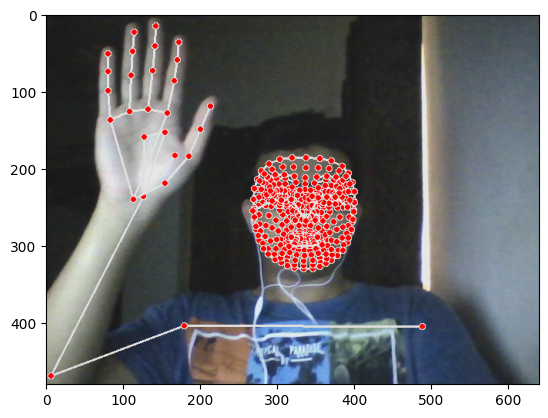

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
results.pose_landmarks

landmark {
  x: 0.5277014970779419
  y: 0.5603067874908447
  z: -0.8886386156082153
  visibility: 0.9998037815093994
}
landmark {
  x: 0.5526329278945923
  y: 0.49592140316963196
  z: -0.8104506731033325
  visibility: 0.9996914267539978
}
landmark {
  x: 0.5702687501907349
  y: 0.4954449236392975
  z: -0.8108242154121399
  visibility: 0.9995696544647217
}
landmark {
  x: 0.5874375104904175
  y: 0.4955417811870575
  z: -0.8109292984008789
  visibility: 0.9995899200439453
}
landmark {
  x: 0.4974599778652191
  y: 0.5000529885292053
  z: -0.8030495643615723
  visibility: 0.999721884727478
}
landmark {
  x: 0.47808581590652466
  y: 0.5021688342094421
  z: -0.8029496073722839
  visibility: 0.9997014999389648
}
landmark {
  x: 0.4584198594093323
  y: 0.5044544339179993
  z: -0.8036233186721802
  visibility: 0.999792218208313
}
landmark {
  x: 0.6121533513069153
  y: 0.5214745998382568
  z: -0.3533819913864136
  visibility: 0.9995221495628357
}
landmark {
  x: 0.42027631402015686
  y: 0.53301

In [12]:
len(results.right_hand_landmarks.landmark)

21

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
len(pose)

33

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark])

In [16]:
pose.shape

(33, 4)

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()

In [18]:
pose.shape

(132,)

In [19]:
# Error handling if pose is not visible in frame, create a np.zeros array of definite shape
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

In [20]:
face = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
face

array([ 0.5277015 ,  0.56030679, -0.88863862,  0.55263293,  0.4959214 ,
       -0.81045067,  0.57026875,  0.49544492, -0.81082422,  0.58743751,
        0.49554178, -0.8109293 ,  0.49745998,  0.50005299, -0.80304956,
        0.47808582,  0.50216883, -0.80294961,  0.45841986,  0.50445443,
       -0.80362332,  0.61215335,  0.5214746 , -0.35338199,  0.42027631,
        0.53301519, -0.29967684,  0.55960935,  0.62494111, -0.7229104 ,
        0.49231386,  0.62791759, -0.71127492,  0.76263201,  0.84486848,
       -0.11485304,  0.28110117,  0.84283704, -0.15199527,  0.9208833 ,
        1.29521692, -0.42367941,  0.01040663,  0.97764772, -0.84288186,
        0.9264282 ,  1.44239664, -0.94254619,  0.19759201,  0.49287754,
       -1.67398226,  0.95374668,  1.5062412 , -1.04593277,  0.19966295,
        0.33321908, -1.95169103,  0.92410862,  1.45583308, -1.02958572,
        0.2412829 ,  0.31992668, -1.8366363 ,  0.89925879,  1.44274676,
       -0.964513  ,  0.2617124 ,  0.38180846, -1.69291615,  0.67

In [21]:
lh = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
rh = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
rh

array([ 0.5277015 ,  0.56030679, -0.88863862,  0.55263293,  0.4959214 ,
       -0.81045067,  0.57026875,  0.49544492, -0.81082422,  0.58743751,
        0.49554178, -0.8109293 ,  0.49745998,  0.50005299, -0.80304956,
        0.47808582,  0.50216883, -0.80294961,  0.45841986,  0.50445443,
       -0.80362332,  0.61215335,  0.5214746 , -0.35338199,  0.42027631,
        0.53301519, -0.29967684,  0.55960935,  0.62494111, -0.7229104 ,
        0.49231386,  0.62791759, -0.71127492,  0.76263201,  0.84486848,
       -0.11485304,  0.28110117,  0.84283704, -0.15199527,  0.9208833 ,
        1.29521692, -0.42367941,  0.01040663,  0.97764772, -0.84288186,
        0.9264282 ,  1.44239664, -0.94254619,  0.19759201,  0.49287754,
       -1.67398226,  0.95374668,  1.5062412 , -1.04593277,  0.19966295,
        0.33321908, -1.95169103,  0.92410862,  1.45583308, -1.02958572,
        0.2412829 ,  0.31992668, -1.8366363 ,  0.89925879,  1.44274676,
       -0.964513  ,  0.2617124 ,  0.38180846, -1.69291615,  0.67

In [29]:

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [30]:
extract_keypoints(results).shape

(1662,)

In [25]:
468*3+33*4+21*3+21*3

1662

In [31]:
result_test = extract_keypoints(results)

In [32]:
result_test

array([ 0.5277015 ,  0.56030679, -0.88863862, ...,  0.12585399,
        0.10794027, -0.0503708 ])

In [33]:
np.save('0',result_test)

In [34]:
np.load('0.npy')

array([ 0.5277015 ,  0.56030679, -0.88863862, ...,  0.12585399,
        0.10794027, -0.0503708 ])

# 4. Setup Folders for Collection

In [27]:
# Path for exported data, numpy arrays (key points)
Data_Path = os.path.join('MP_data')

# Action that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# 30 videos worth of data 
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30 

In [28]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(Data_Path, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length\
            for frame_num in range(sequence_length):
                
                # Reed feed
                ret, frame = cap.read()
                
                # Make Detections
                image, results = mediapipe_detection(frame, holistic)
                
                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Apply wait logic 
                if frame_num == 0:
                    cv2.putText(image, 'Starting Collection', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 1, cv2.LINE_AA)
                    cv2.putText(image, 'Collectiing frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collectiing frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_pth = os.path.join(Data_Path, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                #Show to screen
                cv2.imshow('OpenCV Feed', image)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

# 7. Build and Train LSTM Neural Network

# 8. Make Predictions

# 9. Save Eights